# Part One: Research Question

## Section A: [Research question here...]

## Section B: Data Dictionary

# Part Two: Data Cleaning Plan

## Section C.1: Techniques & Steps

### Techniques
Identify Duplicated Rows

Identify Missing Values

Identify Outliers

### Duplicated Rows
Use duplicated() and sum(duplicated) functions

### Missing Values
Use isnull.sum() and msno.matrix(df) to visualize

### Identify Outliers
Use boxplot and z-scores

## Section C.2: Assessing Data Quality

## Section C.3: Programming Environment

## Section C.4: Code

In [60]:
# import pandas library
import pandas as pd

In [28]:
# read churn data into DataFrame
df = pd.read_csv('source files/churn_raw_data.csv', header='infer')

In [29]:
# get shape (rows & columns) of the DataFrame
df.shape

(10000, 52)

In [30]:
# get header and first 5 rows of the DataFrame
df.head(5)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [34]:
# view information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

### Duplicated Rows

In [56]:
# return duplicated rows
df[df.duplicated() == True]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


### Missing Values

In [59]:
# find the sum of missing values for each column
df.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [65]:
# install missingno using pip
# !pip install missingno

In [64]:
# import missingno to visualize missing values
import missingno as msno

In [79]:
# isolate columns with missing values and add them to a new DataFrame
df_missing = df.loc[:, df.isnull().sum() > 0]
df_missing.isnull().sum()

Children             2495
Age                  2475
Income               2490
Techie               2477
Phone                1026
TechSupport           991
Tenure                931
Bandwidth_GB_Year    1021
dtype: int64

<Axes: >

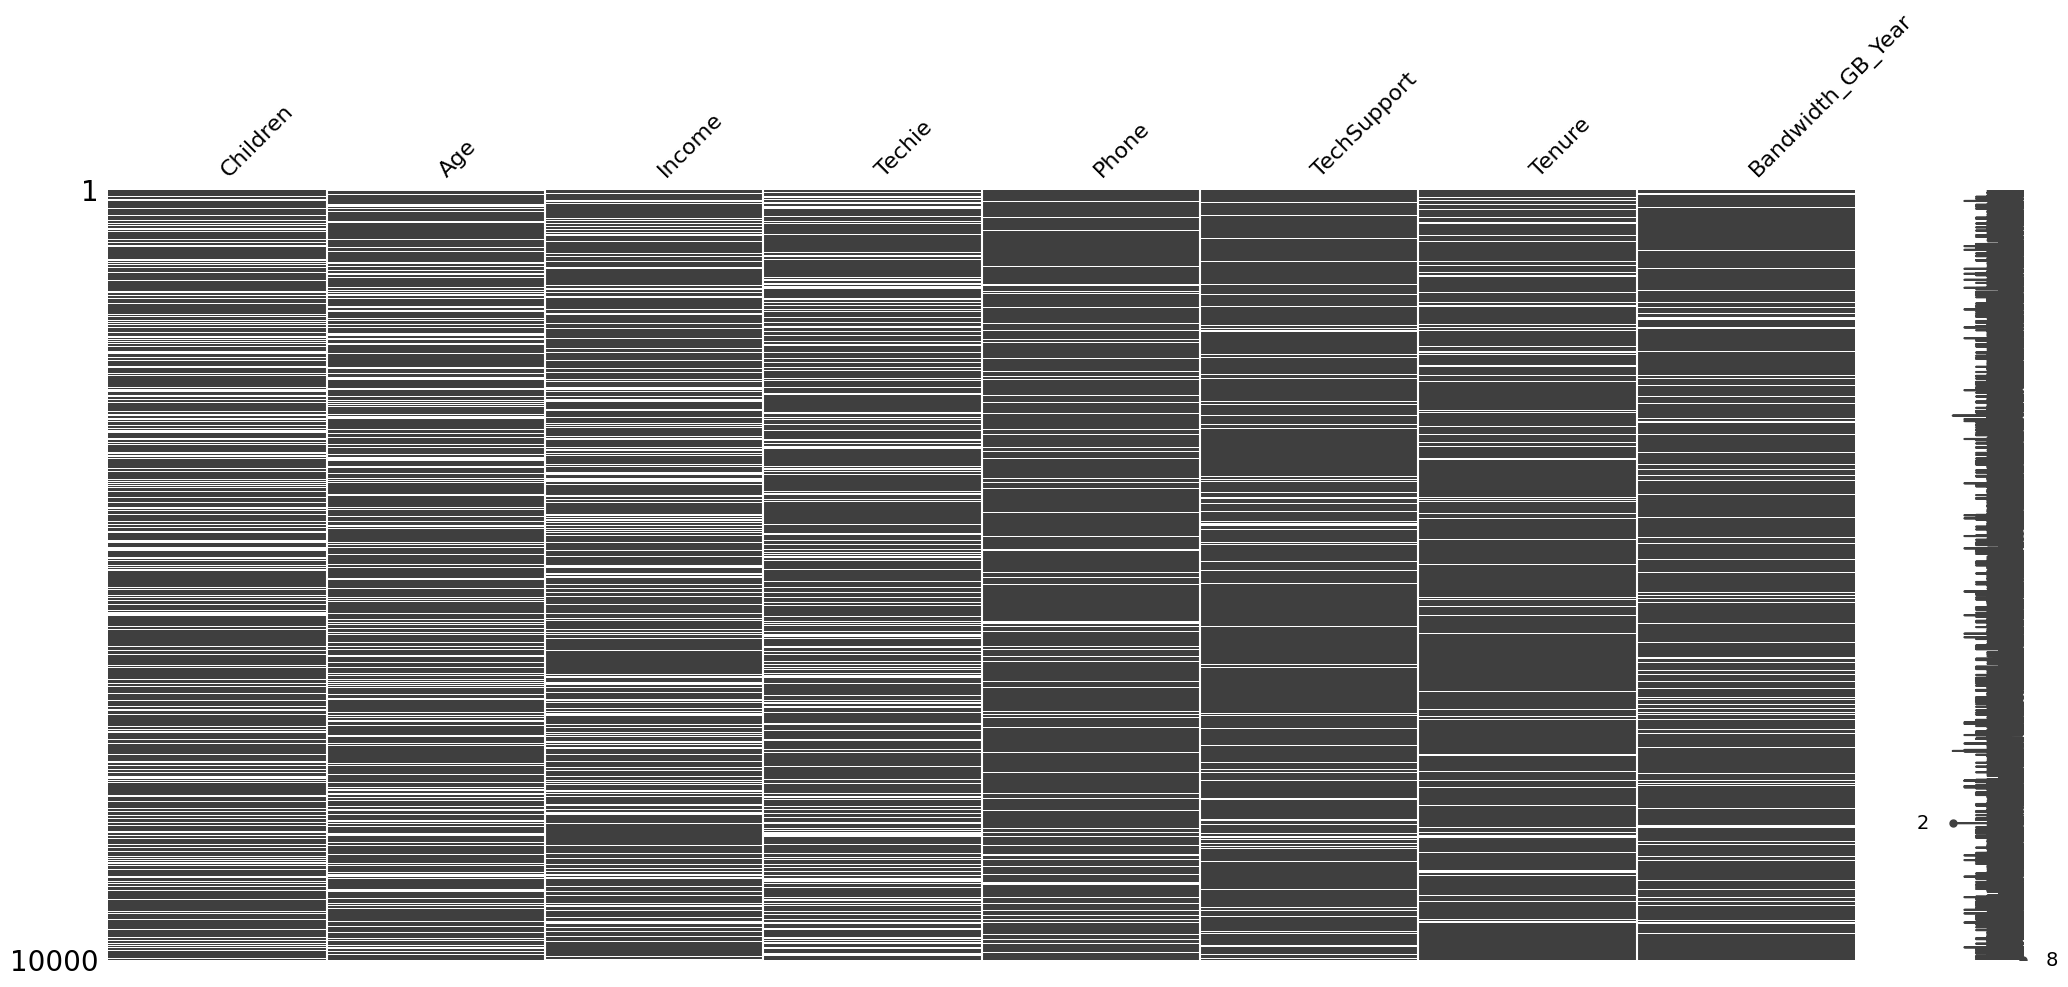

In [80]:
# generate matrix of missing values
msno.matrix(df_missing)

array([[<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>]], dtype=object)

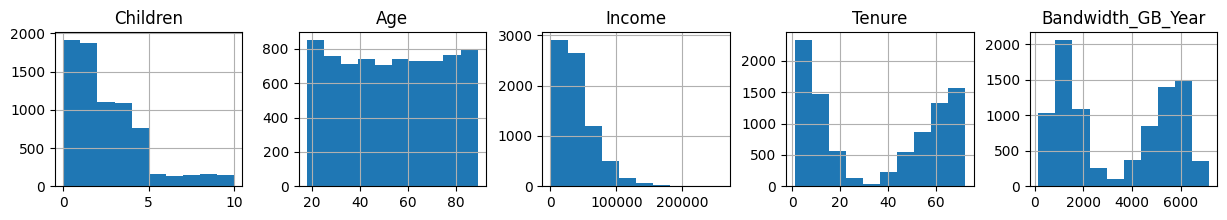

In [88]:
# use histograms to check columns in df_missing for skewness
df_missing.hist(figsize=(15,2), layout=(1,5))

### Outliers

In [90]:
# isolate columns with numerical data relevant for outlier analysis
df_numericals = df[['Children', 
                    'Age', 
                    'Income', 
                    'Outage_sec_perweek', 
                    'Email', 
                    'Contacts', 
                    'Yearly_equip_failure', 
                    'Tenure', 
                    'MonthlyCharge', 
                    'Bandwidth_GB_Year']]

df_numericals.head(5)

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,NaN,68.0,28561.99,6.972566,10,0,1,6.795513,171.449762,904.536110
1,1.0,27.0,21704.77,12.014541,12,0,1,1.156681,242.948015,800.982766
2,4.0,50.0,NaN,10.245616,9,0,1,15.754144,159.440398,2054.706961
3,1.0,48.0,18925.23,15.206193,15,2,0,17.087227,120.249493,2164.579412
4,0.0,83.0,40074.19,8.960316,16,2,1,1.670972,150.761216,271.493436


<Axes: >

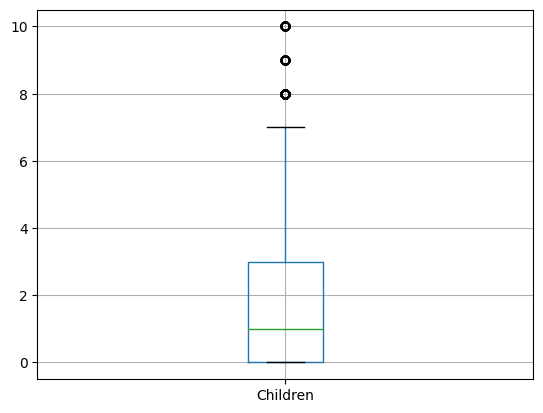

In [97]:
df_numericals.boxplot(column='Children')

<Axes: >

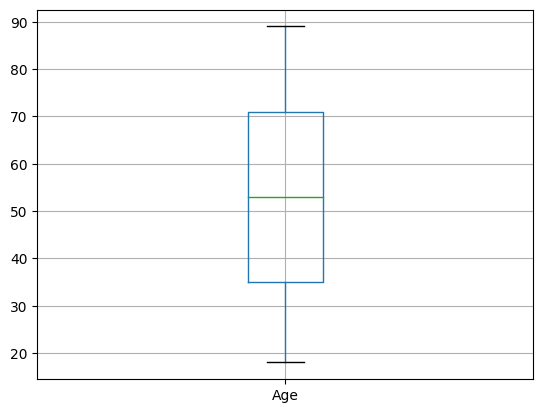

In [98]:
df_numericals.boxplot(column='Age')

<Axes: >

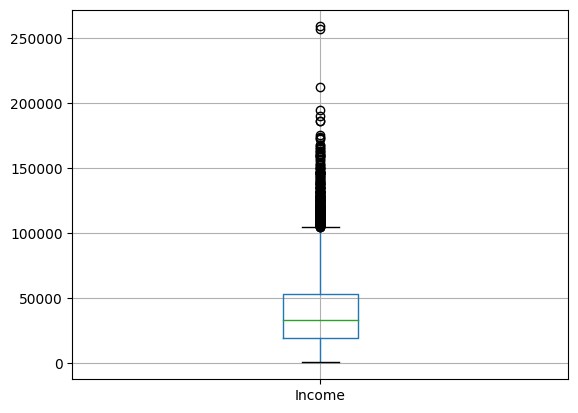

In [99]:
df_numericals.boxplot(column='Income')

<Axes: >

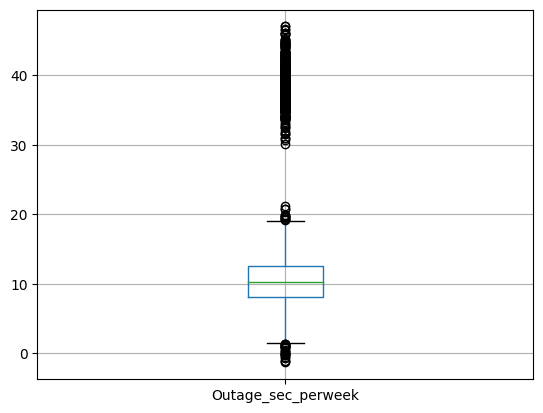

In [100]:
df_numericals.boxplot(column='Outage_sec_perweek')

<Axes: >

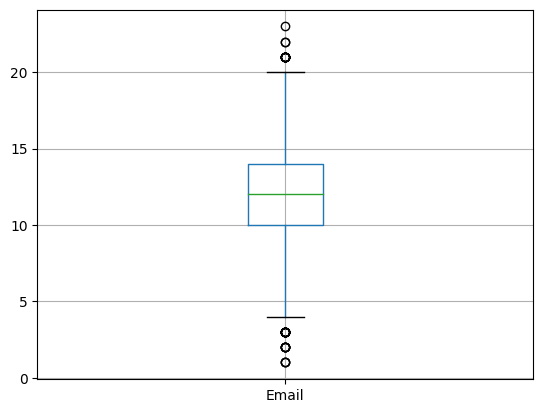

In [101]:
df_numericals.boxplot(column='Email')

<Axes: >

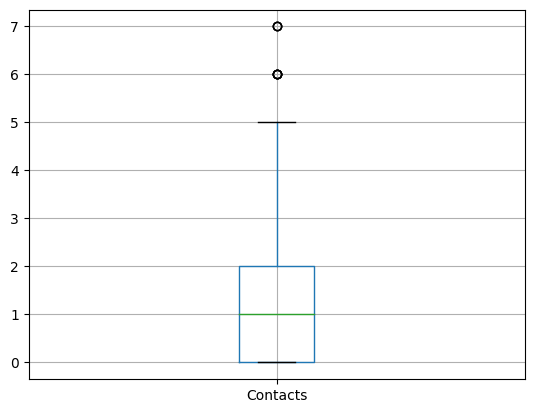

In [102]:
df_numericals.boxplot(column='Contacts')

<Axes: >

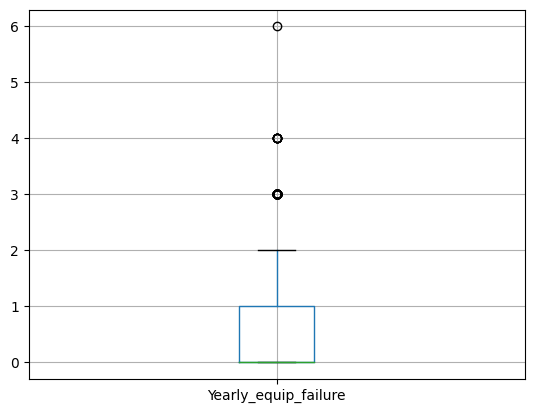

In [104]:
df_numericals.boxplot(column='Yearly_equip_failure')

<Axes: >

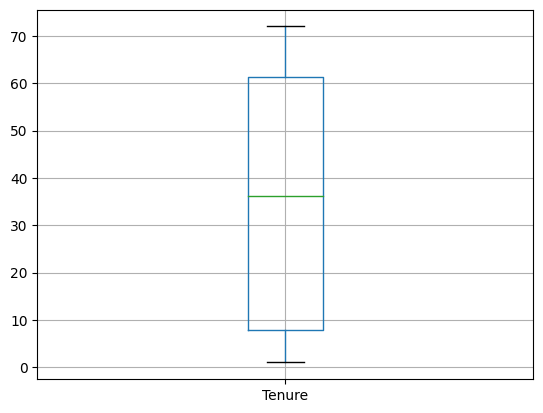

In [105]:
df_numericals.boxplot(column='Tenure')

<Axes: >

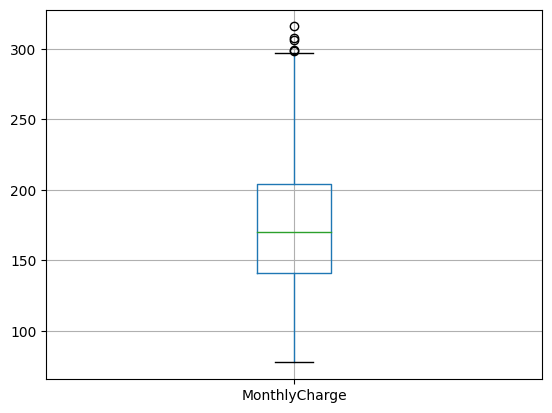

In [106]:
df_numericals.boxplot(column='MonthlyCharge')

<Axes: >

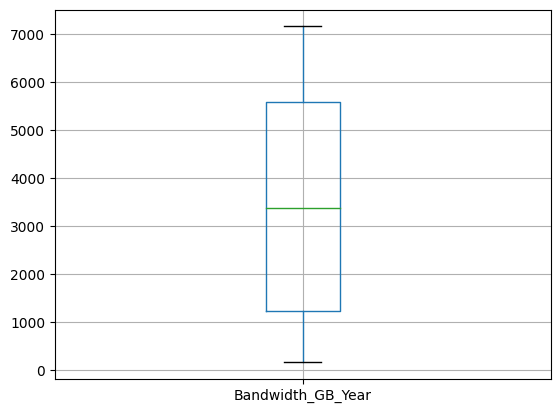

In [107]:
df_numericals.boxplot(column='Bandwidth_GB_Year')

In [116]:
# import scipy.stats to calculate z-scores
from scipy import stats

In [123]:
# create a new DataFrame to hold z-scores for columns that contain outliers
data = {
    'Children':[], 
    'Income':[], 
    'Outage_sec_perweek':[], 
    'Email':[], 
    'Contacts':[], 
    'Yearly_equip_failure':[],  
    'MonthlyCharge':[]
       }

df_zscores = pd.DataFrame(data)

In [124]:
# add z-scores to df_zscores
df_zscores['Children'] = stats.zscore(df_numericals['Children'], nan_policy='omit')
df_zscores['Income'] = stats.zscore(df_numericals['Income'], nan_policy='omit')
df_zscores['Outage_sec_perweek'] = stats.zscore(df_numericals['Outage_sec_perweek'], nan_policy='omit')
df_zscores['Email'] = stats.zscore(df_numericals['Email'], nan_policy='omit')
df_zscores['Contacts'] = stats.zscore(df_numericals['Contacts'], nan_policy='omit')
df_zscores['Yearly_equip_failure'] = stats.zscore(df_numericals['Yearly_equip_failure'], nan_policy='omit')
df_zscores['MonthlyCharge'] = stats.zscore(df_numericals['MonthlyCharge'], nan_policy='omit')

df_zscores.head(5)

,Children,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,MonthlyCharge
0,NaN,-0.401133,-0.637726,-0.666282,-1.005852,0.946658,-0.060613
1,-0.508646,-0.642955,0.079935,-0.005288,-1.005852,0.946658,1.589348
2,0.883715,NaN,-0.171849,-0.996779,-1.005852,0.946658,-0.337752
3,-0.508646,-0.740976,0.534225,0.986203,1.017588,-0.625864,-1.242158
4,-0.972766,0.004846,-0.354795,1.316700,1.017588,0.946658,-0.538041


In [147]:
# return records where absolute value of z-score is greater than or equal to 3, Children column
df_zscores[df_zscores['Children'].abs() > 3]['Children']

30      3.204316
97      3.668436
144     3.668436
329     3.204316
334     3.204316
          ...   
9599    3.668436
9623    3.668436
9790    3.668436
9871    3.668436
9901    3.204316
Name: Children, Length: 144, dtype: float64

In [148]:
# return records where absolute value of z-score is greater than or equal to 3, Income column
df_zscores[df_zscores['Income'].abs() > 3]['Income']

46      3.250729
130     3.028507
186     3.378085
470     4.119111
511     3.757785
          ...   
9615    3.187357
9639    3.879732
9656    3.416552
9849    3.332790
9876    3.122070
Name: Income, Length: 110, dtype: float64

In [149]:
# return records where absolute value of z-score is greater than or equal to 3, Outage_sec_perweek column
df_zscores[df_zscores['Outage_sec_perweek'].abs() > 3]['Outage_sec_perweek']

28      4.622272
36      4.735879
40      3.907495
61      4.046782
130     4.020157
          ...   
9894    4.703786
9895    4.160788
9907    3.853321
9945    3.968939
9950    4.201985
Name: Outage_sec_perweek, Length: 491, dtype: float64

In [150]:
# return records where absolute value of z-score is greater than or equal to 3, Email column
df_zscores[df_zscores['Email'].abs() > 3]['Email']

795    -3.310257
1152   -3.310257
1381   -3.640754
1399   -3.310257
1473    3.630178
1746    3.299681
6320   -3.640754
7408   -3.310257
8365   -3.640754
8948   -3.310257
9248   -3.310257
9475    3.299681
Name: Email, dtype: float64

In [151]:
# return records where absolute value of z-score is greater than or equal to 3, Contacts column
df_zscores[df_zscores['Contacts'].abs() > 3]['Contacts']

88      3.041027
129     3.041027
187     4.052747
205     3.041027
345     3.041027
          ...   
9799    3.041027
9805    3.041027
9828    3.041027
9923    3.041027
9972    3.041027
Name: Contacts, Length: 165, dtype: float64

In [152]:
# return records where absolute value of z-score is greater than or equal to 3, Yearly_equip_failure column
df_zscores[df_zscores['Yearly_equip_failure'].abs() > 3]['Yearly_equip_failure']

8       4.091701
20      4.091701
171     4.091701
592     4.091701
621     4.091701
          ...   
9623    5.664222
9674    4.091701
9763    5.664222
9769    4.091701
9967    4.091701
Name: Yearly_equip_failure, Length: 94, dtype: float64

In [153]:
# return records where absolute value of z-score is greater than or equal to 3, MonthlyCharge column
df_zscores[df_zscores['MonthlyCharge'].abs() > 3]['MonthlyCharge']

927     3.079659
3746    3.272363
4700    3.050579
Name: MonthlyCharge, dtype: float64

# Part Three: Data Cleaning

## Section D.1: Data Quality Findings

## Section D.2: Methods 

## Section D.3: Code 

## Section D.4: Verification and Outcome

## Section D.5: Output File 

## Section D.6: Limitations 

## Section D.7: Effect on the Research Question

## Section E.1: Principal Component Analysis

## Section E.2: Kaiser Rule

## Section E.3: Benefits of PCA

# Part Four: Supporting Documents

## Section F: Panopto Video

## Section G: Web Sources

- missingno (webinar/book)
- DataFrame.loc https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
- z-scores https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html

## Section H: References